<b>Source:</b><br>
- Book: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow<br> 
- Author: Aurelian Geron

### 1. DATA EXPLORATION

<b>Load the libraries</b>

In [1]:
import numpy as np
import pandas as pd

<b>Read the CSV file</b>

In [2]:
housing = pd.read_csv(
                "C:\\Users\\iwanJ\\Downloads\\housing.csv",
                thousands=',')

<b>Display the first 5 rows</b>

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<b>Explore the data type of each feature</b>

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<b>Summarize the categorical feature</b>

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<b>Explore the distribution of the whole numerical features</b>

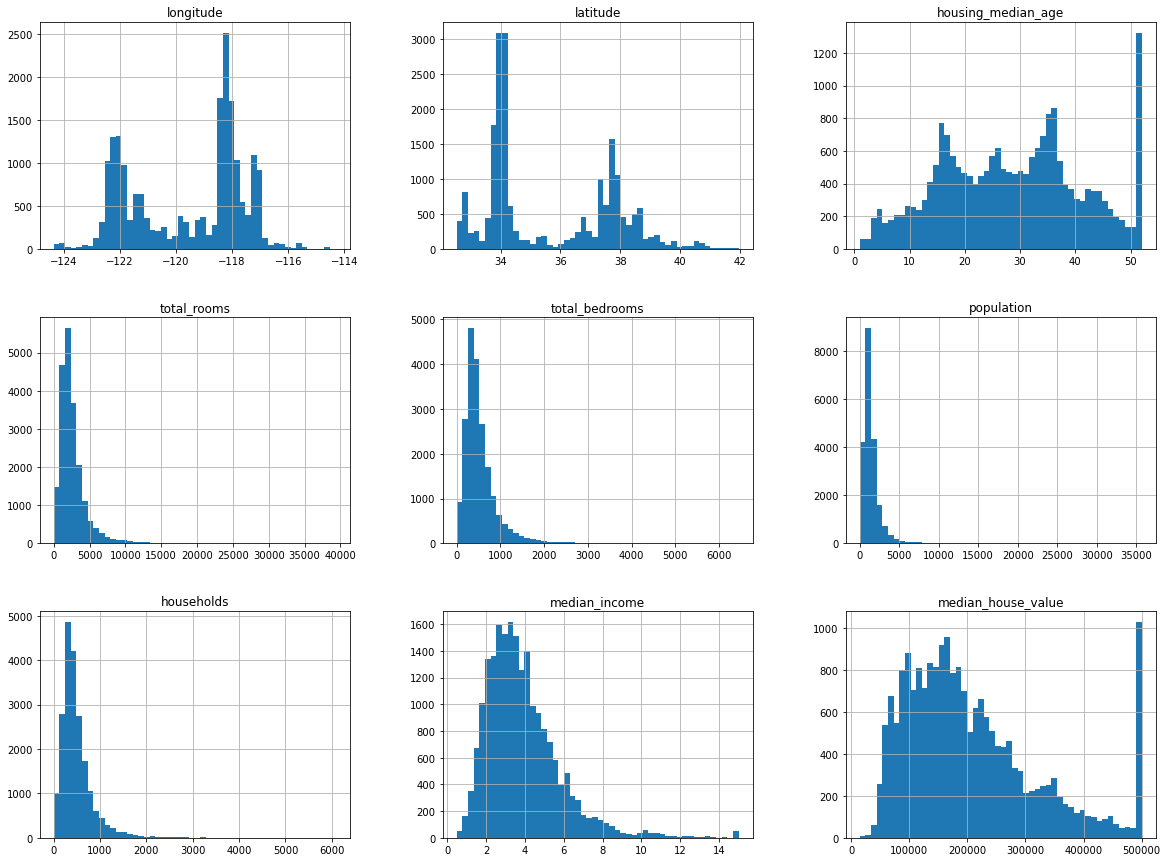

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

<b>Explore the median income</b>

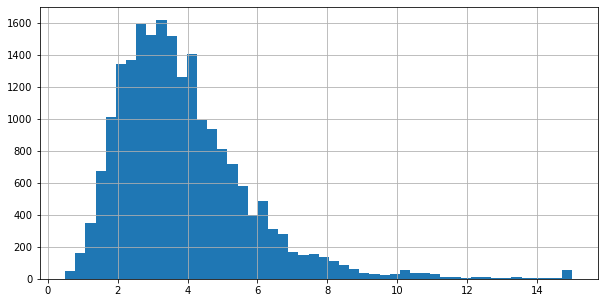

In [7]:
housing["median_income"].hist(bins=50, figsize=(10, 5))
plt.show()

<b>Transform the median income into categories to further explore the distribution</b>

In [8]:
housing["income_cat"] = pd.cut(
                            housing["median_income"],
                            bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels = [1, 2, 3, 4, 5])

In [9]:
pd.DataFrame(housing["income_cat"]).head()

,income_cat
0,5
1,5
2,5
3,4
4,3


<b>Explore the distribution of the categories income</b>

<AxesSubplot:>

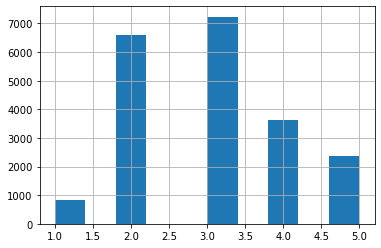

In [10]:
housing["income_cat"].hist()

### 2. DATA SPLITTING

### a) Split the data using standard method

<b>Generate a random sequence of the index</b>

In [11]:
np.random.seed(100)
shuffled_indices = np.random.permutation(len(housing))
print(shuffled_indices)

[ 8151    53  3039 ... 12119 14147  5640]


<b>Set the size of the test set</b>

In [12]:
test_ratio = 0.2
test_set_size = int(len(housing) * test_ratio)
print("The size of the test set: ", test_set_size, " rows")

The size of the test set:  4128  rows


<b>See the index element of the test set</b>

In [13]:
test_indices = shuffled_indices[:test_set_size]
print("Test set index element: ", test_indices)

Test set index element:  [ 8151    53  3039 ... 12374 19662 11942]


<b>Set the train set</b>

In [14]:
train_indices = shuffled_indices[test_set_size:]
print("The size of the train set: ", len(train_indices), " rows")
print("Train set index element: ", train_indices)

The size of the train set:  16512  rows
Train set index element:  [ 3278 16630 18748 ... 12119 14147  5640]


### b) Split the data using Scikit-Learn 

<b>Load the scikit-learn library</b>

In [15]:
from sklearn.model_selection import train_test_split

<b>Apply the <i>"train_test_split"</i> function</b>

In [16]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=100)

<b>Explore the train set</b>

In [17]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3278,-122.70,39.14,13.0,532.0,111.0,214.0,62.0,3.3929,108300.0,INLAND,3
16630,-120.83,35.32,11.0,3252.0,701.0,1814.0,660.0,3.2226,183200.0,NEAR OCEAN,3
18748,-122.31,40.49,18.0,4026.0,718.0,1731.0,705.0,3.3500,118400.0,INLAND,3
14961,-116.92,32.76,7.0,1659.0,237.0,862.0,242.0,5.2741,249400.0,<1H OCEAN,4
1740,-122.34,37.97,19.0,2237.0,580.0,1438.0,551.0,2.3382,120700.0,NEAR BAY,2


In [18]:
print("Train set size: ", len(train_set))

Train set size:  16512


<b>Explore the test set</b>

In [19]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
8151,-118.10,33.81,36.0,1111.0,184.0,444.0,177.0,3.7031,245300.0,<1H OCEAN,3
53,-122.27,37.82,52.0,1630.0,456.0,1162.0,400.0,1.2475,104200.0,NEAR BAY,1
3039,-119.12,35.37,13.0,4527.0,713.0,2170.0,671.0,4.8266,146200.0,INLAND,4
9484,-123.15,39.31,19.0,1026.0,205.0,424.0,152.0,2.8833,154200.0,INLAND,2
9307,-122.52,37.98,31.0,6555.0,1571.0,2962.0,1464.0,2.8903,324200.0,NEAR BAY,2


In [20]:
print("Test set size: ", len(test_set))

Test set size:  4128


### c) Split the data based on the stratified sampling

<b>Load the stratified sampling library</b>

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

<b>Initiate the <i>"StratifiedShuffleSplit"</i> function</b>

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=100)

<b>Apply the stratified sampling based on the income category <i>("income_cat")</i></b>

In [23]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

<b>Explore the train set of the stratified sampling</b>

In [24]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3553,-118.61,34.22,24.0,5256.0,758.0,2474.0,780.0,7.3252,333700.0,<1H OCEAN,5
17151,-122.19,37.43,39.0,2392.0,420.0,937.0,406.0,6.6136,472800.0,NEAR OCEAN,5
6308,-118.01,34.05,37.0,682.0,172.0,813.0,173.0,3.8125,138000.0,<1H OCEAN,3
4470,-118.17,34.09,36.0,3066.0,797.0,3097.0,780.0,2.5523,156500.0,<1H OCEAN,2
4750,-118.32,34.04,39.0,2965.0,812.0,2638.0,794.0,2.5320,172700.0,<1H OCEAN,2


In [25]:
print("Train set size: ", len(strat_train_set))

Train set size:  16512


<b>Explore the test set of the stratified sampling</b>

strat_test_set.head()

In [26]:
print("Test set size: ", len(strat_test_set))

Test set size:  4128


### d) Compare the proportion (%) of the income category after stratified sampling

<b>The proportion of the income category in the train set</b>

In [27]:
pd.DataFrame((strat_train_set["income_cat"].value_counts()) / (len(strat_train_set)))

,income_cat
3,0.350594
2,0.318859
4,0.176296
5,0.114402
1,0.039850


<b>The proportion of the income category in the test set</b>

In [28]:
pd.DataFrame((strat_test_set["income_cat"].value_counts()) / (len(strat_test_set)))

,income_cat
3,0.350533
2,0.318798
4,0.176357
5,0.114583
1,0.039729


<b>The proportion of the income category in the original set</b>

In [29]:
pd.DataFrame((housing["income_cat"].value_counts()) / (len(housing)))

,income_cat
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


### e) Remove the income category

In [30]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<b>Train set</b>

In [31]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3553,-118.61,34.22,24.0,5256.0,758.0,2474.0,780.0,7.3252,333700.0,<1H OCEAN
17151,-122.19,37.43,39.0,2392.0,420.0,937.0,406.0,6.6136,472800.0,NEAR OCEAN
6308,-118.01,34.05,37.0,682.0,172.0,813.0,173.0,3.8125,138000.0,<1H OCEAN
4470,-118.17,34.09,36.0,3066.0,797.0,3097.0,780.0,2.5523,156500.0,<1H OCEAN
4750,-118.32,34.04,39.0,2965.0,812.0,2638.0,794.0,2.5320,172700.0,<1H OCEAN


<b>Test set</b>

In [32]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13869,-117.31,34.41,14.0,3019.0,643.0,1639.0,582.0,1.5288,103400.0,INLAND
10942,-117.88,33.74,16.0,1444.0,446.0,2329.0,441.0,3.1691,159400.0,<1H OCEAN
1906,-120.02,38.76,15.0,3142.0,618.0,725.0,285.0,4.3333,121400.0,INLAND
5713,-118.25,34.22,34.0,2510.0,535.0,1516.0,542.0,3.8068,267000.0,<1H OCEAN
11967,-117.40,34.00,31.0,1192.0,307.0,1013.0,283.0,2.0742,76200.0,INLAND


### 3. EXPLORATORY DATA ANALYSIS (EDA)

<b>Make a copy of the train set</b>

In [33]:
housing_strat_train_set = strat_train_set
housing_strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3553,-118.61,34.22,24.0,5256.0,758.0,2474.0,780.0,7.3252,333700.0,<1H OCEAN
17151,-122.19,37.43,39.0,2392.0,420.0,937.0,406.0,6.6136,472800.0,NEAR OCEAN
6308,-118.01,34.05,37.0,682.0,172.0,813.0,173.0,3.8125,138000.0,<1H OCEAN
4470,-118.17,34.09,36.0,3066.0,797.0,3097.0,780.0,2.5523,156500.0,<1H OCEAN
4750,-118.32,34.04,39.0,2965.0,812.0,2638.0,794.0,2.5320,172700.0,<1H OCEAN


### a) Geographical Information

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

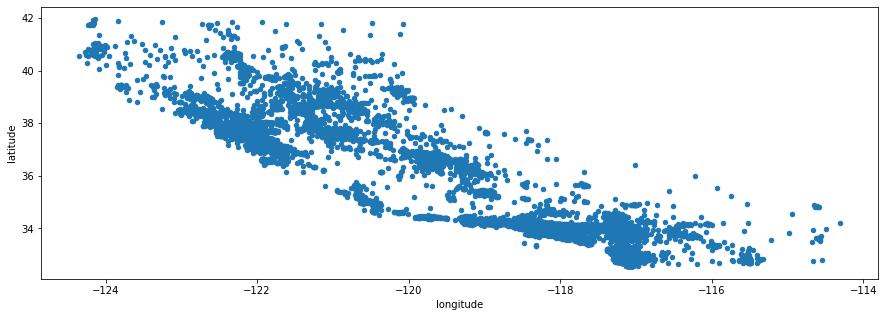

In [34]:
housing_strat_train_set.plot(kind="scatter", x="longitude", y="latitude", figsize=(15, 5))

### b) Density of the Geographical Information

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

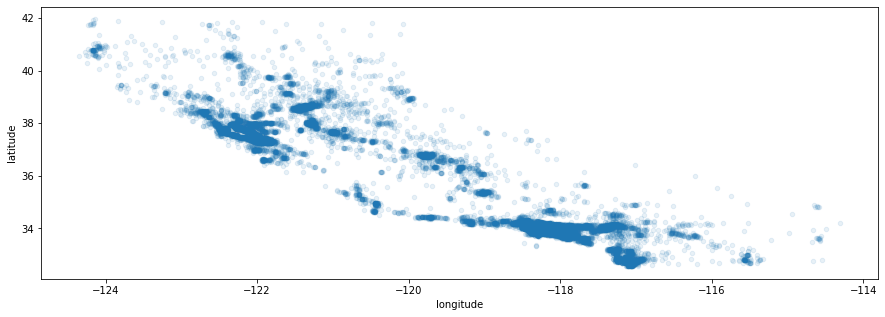

In [35]:
housing_strat_train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(15, 5))

### c) The House's Price Based on the Geographical Information and Density

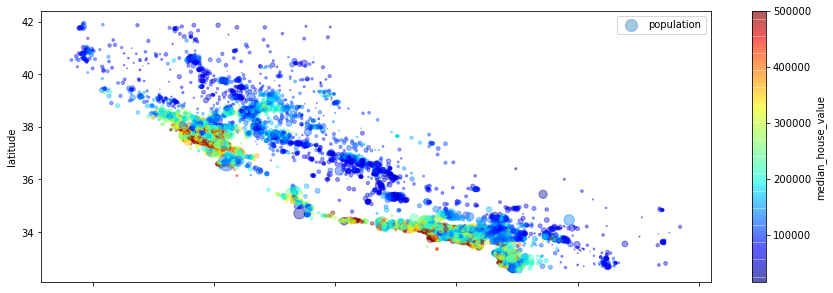

In [36]:
housing_strat_train_set.plot(
                        kind="scatter", 
                        x="longitude", 
                        y="latitude", 
                        alpha=0.4,
                        s=housing_strat_train_set["population"]/100, 
                        label="population", 
                        figsize=(15,5),
                        c="median_house_value", 
                        cmap=plt.get_cmap("jet"), 
                        colorbar=True)
plt.legend()

### d) Correlation

In [37]:
corr_matrix = housing_strat_train_set.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924148,-0.105818,0.045646,0.070797,0.099174,0.056418,-0.019644,-0.047238
latitude,-0.924148,1.000000,0.009068,-0.037967,-0.069148,-0.109639,-0.073138,-0.076488,-0.143568
housing_median_age,-0.105818,0.009068,1.000000,-0.356628,-0.316304,-0.295695,-0.298865,-0.118434,0.106142
total_rooms,0.045646,-0.037967,-0.356628,1.000000,0.929875,0.864064,0.919272,0.200637,0.134724
total_bedrooms,0.070797,-0.069148,-0.316304,0.929875,1.000000,0.885628,0.980305,-0.006060,0.052120
population,0.099174,-0.109639,-0.295695,0.864064,0.885628,1.000000,0.914481,0.007908,-0.023676
households,0.056418,-0.073138,-0.298865,0.919272,0.980305,0.914481,1.000000,0.015104,0.067287
median_income,-0.019644,-0.076488,-0.118434,0.200637,-0.006060,0.007908,0.015104,1.000000,0.686705
median_house_value,-0.047238,-0.143568,0.106142,0.134724,0.052120,-0.023676,0.067287,0.686705,1.000000


<b>Correlation between <i>"median house values"</i> (dependent) and <i>"other features"</i> (independents)</b>

It can be seen that <b><u>the highest correlated</u></b> happens between <i><u>"median house value"</u></i> and <i><u>"median income"</u></i> <b>(high positive correlation)</b>. Meanwhile, <b><u>"the lowest correlated"</u></b> happens between <u><i>"median house value"</i></u> and <u><i>"population"</i></u> <b>(low negative correlation)</b>

In [38]:
pd.DataFrame(corr_matrix["median_house_value"].sort_values(ascending=False))

,median_house_value
median_house_value,1.000000
median_income,0.686705
total_rooms,0.134724
housing_median_age,0.106142
households,0.067287
total_bedrooms,0.052120
population,-0.023676
longitude,-0.047238
latitude,-0.143568


### e) Correlation Plot

<b>Load the library to plot the correlations</b>

In [39]:
from pandas.plotting import scatter_matrix

<b>Choose the 3 highest correlations to the median house value</b>

In [40]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

<b>Plot the correlation</b>

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

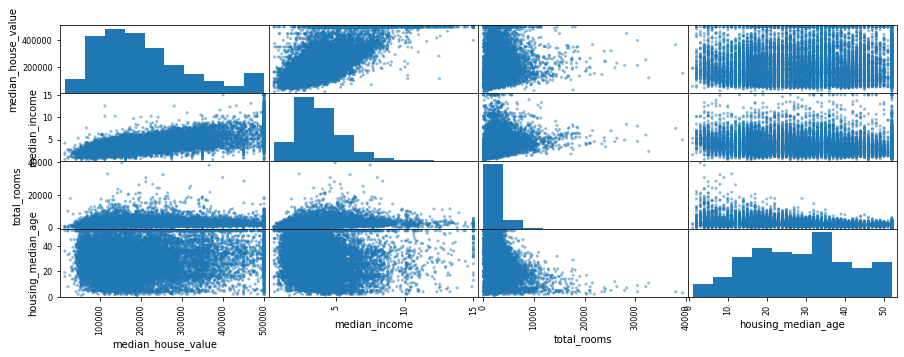

In [41]:
scatter_matrix(
    housing_strat_train_set[attributes], 
    figsize=(15, 5))

<b>Explore the highest correlation to the median house value</b>

It can be concluded that the higher the median income, the higher the median house value will be.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

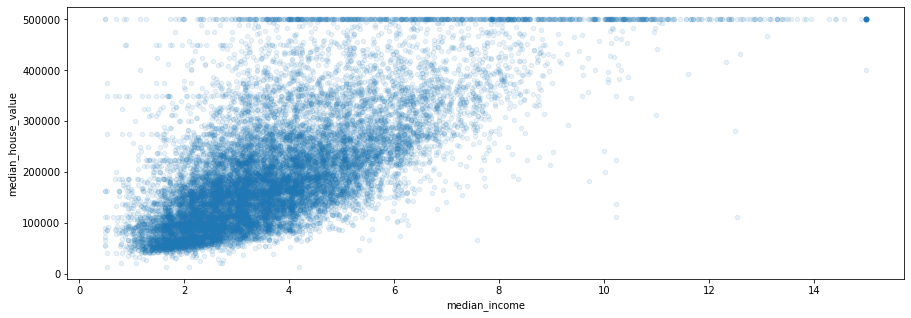

In [42]:
housing_strat_train_set.plot(
    kind="scatter", 
    x="median_income", 
    y="median_house_value", 
    alpha=0.1,
    figsize=(15,5))

### 4. DATA PREPARATION

<b>Prior to doing some further process in the preparation, the target variable (<i>"y"</i>) should be taken out.</b>

In [43]:
X_housing_strat_train_set = housing_strat_train_set.drop("median_house_value", axis=1)

### a) Scikit-Learn to handle missing value

<b>Load the <i>"SimpleImputer"</i> library</b>

In [44]:
from sklearn.impute import SimpleImputer

<b>Specify that the missing values will be <i>"replaced by the median value"</i></b>

In [45]:
imputer = SimpleImputer(strategy="median")

<b>As the median value can only replace the numerical features, the non numerical features should be droped</b>

In [46]:
housing_num = X_housing_strat_train_set.drop("ocean_proximity", axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3553,-118.61,34.22,24.0,5256.0,758.0,2474.0,780.0,7.3252
17151,-122.19,37.43,39.0,2392.0,420.0,937.0,406.0,6.6136
6308,-118.01,34.05,37.0,682.0,172.0,813.0,173.0,3.8125
4470,-118.17,34.09,36.0,3066.0,797.0,3097.0,780.0,2.5523
4750,-118.32,34.04,39.0,2965.0,812.0,2638.0,794.0,2.5320


<b>Train the <i>"Imputer"</i> using the housing numerical feature to gain the median values of all features</b>

In [47]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

<b>Display the median values of all features</b>

In [48]:
pd.DataFrame(imputer.statistics_).transpose()

,0,1,2,3,4,5,6,7
0,-118.49,34.26,29.0,2126.0,434.0,1164.0,409.0,3.5332


<b>Apply the median imputer to the numerical feature of train housing set</b>

In [49]:
X = imputer.transform(housing_num)
pd.DataFrame(X[0:5], columns=housing_num.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.61,34.22,24.0,5256.0,758.0,2474.0,780.0,7.3252
1,-122.19,37.43,39.0,2392.0,420.0,937.0,406.0,6.6136
2,-118.01,34.05,37.0,682.0,172.0,813.0,173.0,3.8125
3,-118.17,34.09,36.0,3066.0,797.0,3097.0,780.0,2.5523
4,-118.32,34.04,39.0,2965.0,812.0,2638.0,794.0,2.5320


<b>Transform the output of the median imputer into data frame</b>

In [50]:
df_housing_num_tr = pd.DataFrame(X, columns=housing_num.columns)
df_housing_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.61,34.22,24.0,5256.0,758.0,2474.0,780.0,7.3252
1,-122.19,37.43,39.0,2392.0,420.0,937.0,406.0,6.6136
2,-118.01,34.05,37.0,682.0,172.0,813.0,173.0,3.8125
3,-118.17,34.09,36.0,3066.0,797.0,3097.0,780.0,2.5523
4,-118.32,34.04,39.0,2965.0,812.0,2638.0,794.0,2.5320


### b) Add additional higher correlation variables

<b>The dataset prior to adding the additional features</b>

In [51]:
df_housing_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.61,34.22,24.0,5256.0,758.0,2474.0,780.0,7.3252
1,-122.19,37.43,39.0,2392.0,420.0,937.0,406.0,6.6136
2,-118.01,34.05,37.0,682.0,172.0,813.0,173.0,3.8125
3,-118.17,34.09,36.0,3066.0,797.0,3097.0,780.0,2.5523
4,-118.32,34.04,39.0,2965.0,812.0,2638.0,794.0,2.5320


<b>Add the three additional high correlation features</b>

In [52]:
df_housing_num_tr["rooms_per_household"] = df_housing_num_tr["total_rooms"] / df_housing_num_tr["households"]
df_housing_num_tr["bedrooms_per_room"] = df_housing_num_tr["total_bedrooms"] / df_housing_num_tr["total_rooms"]
df_housing_num_tr["population_per_household"] = df_housing_num_tr["population"] / df_housing_num_tr["households"]

<b>The dataset after adding the additional features</b>

In [53]:
df_housing_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-118.61,34.22,24.0,5256.0,758.0,2474.0,780.0,7.3252,6.738462,0.144216,3.171795
1,-122.19,37.43,39.0,2392.0,420.0,937.0,406.0,6.6136,5.891626,0.175585,2.307882
2,-118.01,34.05,37.0,682.0,172.0,813.0,173.0,3.8125,3.942197,0.252199,4.699422
3,-118.17,34.09,36.0,3066.0,797.0,3097.0,780.0,2.5523,3.930769,0.259948,3.970513
4,-118.32,34.04,39.0,2965.0,812.0,2638.0,794.0,2.5320,3.734257,0.273862,3.322418


### c) Scikit-Learn for scaling the data

<b>Load the <i>"StandardScaler"</i> library</b>

In [54]:
from sklearn.preprocessing import StandardScaler

<b>Initiate the scaler function</b>

In [55]:
std_scaler = StandardScaler()

<b>Fit the scaler by the data frame</b>

In [56]:
std_scaler.fit(df_housing_num_tr)

StandardScaler()

<b>Apply the scaler to the numerical feature of train housing set</b>

In [57]:
X = std_scaler.transform(df_housing_num_tr)
pd.DataFrame(X[0:5], columns=df_housing_num_tr.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,0.476667,-0.659918,-0.370991,1.204850,0.531576,0.943416,0.738233,1.822474,0.548062,-1.052377,0.006339
1,-1.310774,0.844196,0.822859,-0.108878,-0.276599,-0.434655,-0.242123,1.447350,0.192876,-0.578732,-0.068240
2,0.776238,-0.739575,0.663679,-0.893262,-0.869580,-0.545833,-0.852880,-0.029266,-0.624768,0.578070,0.138213
3,0.696353,-0.720832,0.584089,0.200288,0.624827,1.501996,0.738233,-0.693588,-0.629561,0.695064,0.075289
4,0.621460,-0.744261,0.822859,0.153959,0.660693,1.090458,0.774931,-0.704289,-0.711983,0.905151,0.019342


<b>Transform the output of the standar scaler into data frame</b>

In [58]:
df_housing_num_tr = pd.DataFrame(X, columns=df_housing_num_tr.columns)
df_housing_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,0.476667,-0.659918,-0.370991,1.204850,0.531576,0.943416,0.738233,1.822474,0.548062,-1.052377,0.006339
1,-1.310774,0.844196,0.822859,-0.108878,-0.276599,-0.434655,-0.242123,1.447350,0.192876,-0.578732,-0.068240
2,0.776238,-0.739575,0.663679,-0.893262,-0.869580,-0.545833,-0.852880,-0.029266,-0.624768,0.578070,0.138213
3,0.696353,-0.720832,0.584089,0.200288,0.624827,1.501996,0.738233,-0.693588,-0.629561,0.695064,0.075289
4,0.621460,-0.744261,0.822859,0.153959,0.660693,1.090458,0.774931,-0.704289,-0.711983,0.905151,0.019342


### d) Scikit-Learn for transforming the categorical data into dummy features

<b>Load the <i>"OrdinalEncoder"</i> library</b>

In [59]:
from sklearn.preprocessing import OneHotEncoder

<b>Initiate the one hot encoding function</b>

In [60]:
one_hot_encoder = OneHotEncoder()

<b>Prepare the categorical feature that will be transformed</b>

In [61]:
housing_cat = housing_strat_train_set[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
3553,<1H OCEAN
17151,NEAR OCEAN
6308,<1H OCEAN
4470,<1H OCEAN
4750,<1H OCEAN


<b>Fit the function with the categorical feature</b>

In [62]:
housing_cat_tr = one_hot_encoder.fit_transform(housing_cat)
housing_cat_tr

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

<b>See the output of the transformer (array)</b>

In [63]:
housing_cat_tr.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

<b>See the categories of the feature</b>

In [64]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<b>Transform the dummy variables into data frame</b>

In [65]:
df_housing_cat_tr = pd.DataFrame(housing_cat_tr.toarray(), columns=one_hot_encoder.categories_)
df_housing_cat_tr.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


### e) Combine into one train set

<b>Combine the numerical and the categorical features into one set</b>

In [66]:
housing_concat = pd.concat([df_housing_num_tr, df_housing_cat_tr], axis=1)
housing_concat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,0.476667,-0.659918,-0.370991,1.204850,0.531576,0.943416,0.738233,1.822474,0.548062,-1.052377,0.006339,1.0,0.0,0.0,0.0,0.0
1,-1.310774,0.844196,0.822859,-0.108878,-0.276599,-0.434655,-0.242123,1.447350,0.192876,-0.578732,-0.068240,0.0,0.0,0.0,0.0,1.0
2,0.776238,-0.739575,0.663679,-0.893262,-0.869580,-0.545833,-0.852880,-0.029266,-0.624768,0.578070,0.138213,1.0,0.0,0.0,0.0,0.0
3,0.696353,-0.720832,0.584089,0.200288,0.624827,1.501996,0.738233,-0.693588,-0.629561,0.695064,0.075289,1.0,0.0,0.0,0.0,0.0
4,0.621460,-0.744261,0.822859,0.153959,0.660693,1.090458,0.774931,-0.704289,-0.711983,0.905151,0.019342,1.0,0.0,0.0,0.0,0.0


<b>See the features detail of the new train set</b>

In [67]:
housing_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16512 non-null  float64
 10  population_per_household  16512 non-null  float64
 11  (<1H OCEAN,)              16512 non-null  float64
 12  (INLAND,)                 16512 non-null  float64
 13  (ISLAND,)                 16512 non-null  float64
 14  (NEAR 

<b>Adjust the name of each columns' set</b>

In [68]:
housing_concat.columns = [
                'longitude', 
                'latitude', 
                'housing_median_age',
                'total_rooms',
                'total_bedrooms',
                'population',
                'households',
                'median_income',
                'rooms_per_household',
                'bedrooms_per_room',
                'population_per_household',
                '<1H_OCEAN',
                'INLAND',
                'ISLAND',
                'NEAR_BAY',
                'NEAR_OCEAN']

<b>See the final train set</b>

In [69]:
housing_concat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,0.476667,-0.659918,-0.370991,1.204850,0.531576,0.943416,0.738233,1.822474,0.548062,-1.052377,0.006339,1.0,0.0,0.0,0.0,0.0
1,-1.310774,0.844196,0.822859,-0.108878,-0.276599,-0.434655,-0.242123,1.447350,0.192876,-0.578732,-0.068240,0.0,0.0,0.0,0.0,1.0
2,0.776238,-0.739575,0.663679,-0.893262,-0.869580,-0.545833,-0.852880,-0.029266,-0.624768,0.578070,0.138213,1.0,0.0,0.0,0.0,0.0
3,0.696353,-0.720832,0.584089,0.200288,0.624827,1.501996,0.738233,-0.693588,-0.629561,0.695064,0.075289,1.0,0.0,0.0,0.0,0.0
4,0.621460,-0.744261,0.822859,0.153959,0.660693,1.090458,0.774931,-0.704289,-0.711983,0.905151,0.019342,1.0,0.0,0.0,0.0,0.0


### 5. SELECT AND TRAIN A MODEL

### a) Transform the train set into array

<i><b>"X train Set"</b></i>

In [70]:
housing_train_set = housing_concat.to_numpy()
print("The first 5 rows of the X Train set:")
print("---------------------------------------------------------------")
print(housing_train_set[:5])
print("\n")
print("Dimension of the X train set: ", housing_train_set.shape)
print("Total row of the X train set: ", housing_train_set.shape[0])
print("Total col of the X train set: ", housing_train_set.shape[1])

The first 5 rows of the X Train set:
---------------------------------------------------------------
[[ 0.47666708 -0.65991784 -0.37099123  1.20484963  0.53157637  0.94341578
   0.73823293  1.82247384  0.54806193 -1.05237694  0.00633881  1.
   0.          0.          0.          0.        ]
 [-1.31077392  0.84419586  0.82285949 -0.10887825 -0.27659896 -0.4346545
  -0.2421233   1.44734976  0.19287593 -0.57873194 -0.06823975  0.
   0.          0.          0.          1.        ]
 [ 0.7762382  -0.73957495  0.6636794  -0.89326186 -0.86957968 -0.54583258
  -0.85287998 -0.02926639 -0.6247676   0.57807019  0.13821345  1.
   0.          0.          0.          0.        ]
 [ 0.69635257 -0.7208321   0.58408935  0.20028816  0.62482737  1.50199599
   0.73823293 -0.69358815 -0.62956052  0.69506384  0.0752893   1.
   0.          0.          0.          0.        ]
 [ 0.62145979 -0.74426067  0.82285949  0.15395907  0.66069314  1.09045776
   0.77493075 -0.70428941 -0.71198313  0.90515088  0.01934158 

<i><b>"y train set"</b></i>

In [71]:
housing_labels_train_set = housing_strat_train_set["median_house_value"].to_numpy()
print("The first 5 elements of the y train set: ", housing_labels_train_set[:5])
print("Total element of the y train set: ", len(housing_labels_train_set))

The first 5 elements of the y train set:  [333700. 472800. 138000. 156500. 172700.]
Total element of the y train set:  16512


### b) Linear Regression

<b>Load the <i>"LinearRegression"</i> library</b>

In [72]:
from sklearn.linear_model import LinearRegression

<b>Initiate the linear regression</b>

In [73]:
lin_reg = LinearRegression()

<b>Fit the linear regression model with train set</b>

In [74]:
lin_reg.fit(housing_train_set, housing_labels_train_set)

LinearRegression()

### c) Evaluate the Linear Regression Model

<b>Load the Mean Square of Error (MSE) library</b>

In [75]:
from sklearn.metrics import mean_squared_error

<b>Predict the train set value it self using the linear regression model</b>

In [76]:
housing_predictions = lin_reg.predict(housing_train_set)

<b>Evaluate the train set by comparing the actual values and predicted values</b>

In [77]:
lin_mse = mean_squared_error(housing_labels_train_set, housing_predictions)
print("MSE: ", lin_mse)

MSE:  4676983448.358637


<b>Evaluate the Root Mean Square of Error (RMSE)</b>

In [78]:
lin_rmse = np.sqrt(lin_mse)
print("RMSE: ", lin_rmse)

RMSE:  68388.47452867067


According to the RMSE value, it can be concluded that the error of the model, is $68,388

<b>Evaluate the model using Mean Absolute Percentage Error (MAPE)</b>

In [79]:
from sklearn.metrics import mean_absolute_percentage_error

In [80]:
error = mean_absolute_percentage_error(housing_labels_train_set, housing_predictions)
print("MAPE: ", error)

MAPE:  0.28720235816450235


According to the MAPE, the error percentage of the model, is 28%

### d) Regression Tree

<b>Load the <i>"DecisionTreeRegressor"</i> library</b>

In [81]:
from sklearn.tree import DecisionTreeRegressor

<b>Initiate the function for decission tree</b>

In [82]:
tree_reg = DecisionTreeRegressor()

<b>Fit the Decission Tree model with the train set</b>

In [83]:
tree_reg.fit(housing_train_set, housing_labels_train_set)

DecisionTreeRegressor()

<b>Predict the train set using decission tree</b>

In [84]:
housing_predictions = tree_reg.predict(housing_train_set)

<b>MSE of the decission tree</b>

In [85]:
tree_mse = mean_squared_error(housing_labels_train_set, housing_predictions)

<b>RMSE of decission tree</b>

In [86]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<b>MAPE of the decission tree</b>

In [87]:
error = mean_absolute_percentage_error(housing_labels_train_set, housing_predictions)
print("MAPE: ", error)

MAPE:  0.0


### e) Cross-Validation

<b>Load the <i>"cross_val_score"</i> library</b>

In [88]:
from sklearn.model_selection import cross_val_score

### Tree Model Cross-Validation

<b>Initiate the 10 fold cross-validation of decission tree model</b>

In [89]:
scores = cross_val_score(
                    tree_reg, 
                    housing_train_set, 
                    housing_labels_train_set,
                    scoring="neg_mean_squared_error", 
                    cv=10)

<b>Tree model score of each fold</b>

In [90]:
print(scores)

[-5.06896270e+09 -4.93239103e+09 -4.93730091e+09 -4.42461867e+09
 -4.54767008e+09 -4.47220652e+09 -5.72946154e+09 -4.65068624e+09
 -5.50348446e+09 -5.96787551e+09]


<b>Mean of the 10 fold scores</b>

In [91]:
print(scores.mean())

-5023465765.5099535


<b>Standar Deviation of the 10 fold scores</b>

In [92]:
print(scores.std())

516371708.7822687


<b>RMSE of the decission tree</b>

In [93]:
tree_scores = np.sqrt(-scores)
print(tree_scores)

[71196.64808536 70230.98343374 70265.92990339 66517.80714875
 67436.41507055 66874.55808629 75693.20666826 68195.94008186
 74185.47339141 77252.02593387]


In [94]:
print(tree_scores.mean())

70784.8987803485


In [95]:
print(tree_scores.std())

3600.537482900297


### Linear Regression Cross-Validation

<b>Initiate the 10 fold cross-validation of linear regression model</b>

In [96]:
lin_scores = cross_val_score(
                    lin_reg, 
                    housing_train_set, 
                    housing_labels_train_set,
                    scoring="neg_mean_squared_error", 
                    cv=10)

<b>RMSE of the Linear Regression Cross-Validation</b>

In [97]:
lin_rmse_scores = np.sqrt(-lin_scores)

<b>RMSE of each Linear Regression Fold</b>

In [98]:
print(lin_rmse_scores)

[70704.64834781 70326.2276612  69545.61187535 64768.48853158
 67545.19938901 62894.85488679 68439.33563317 68440.77199309
 71955.21991942 71949.49737979]


<b>Mean of the Linear Regression RMSE from all fold</b>

In [99]:
print(lin_rmse_scores.mean())

68656.98556172202


<b>Standard Deviation of the Linear Regression RMSE from all fold</b>

In [100]:
print(lin_rmse_scores.std())

2813.195338202353


### f) Random Forest

<b>Load the "RandomForestRegressor" Library</b>

In [101]:
from sklearn.ensemble import RandomForestRegressor

<b>Assign the Random Forest Library</b>

In [102]:
forest_reg = RandomForestRegressor()

<b>Fit random forest with train set</b>

In [103]:
forest_reg.fit(housing_train_set, housing_labels_train_set)

RandomForestRegressor()

<b>Predict the train set using the initiated random forest model</b>

In [104]:
housing_predictions = forest_reg.predict(housing_train_set)

<b>Measure the MSE of the train set</b>

In [105]:
forest_mse = mean_squared_error(housing_labels_train_set, housing_predictions)
forest_mse

350220733.82246614

<b>Compute the RMSE of the train set</b>

In [106]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18714.185363580913

<b>Compute the MAPE of the train set</b>

In [107]:
error = mean_absolute_percentage_error(housing_labels_train_set, housing_predictions)
print("MAPE: ", error)

MAPE:  0.06698508700643532


### Random Forest Cross-Validation

<b>Initiate the 10-fold Cross Validation of Random Forest</b>

In [108]:
forest_scores = cross_val_score(
                    forest_reg, 
                    housing_train_set, 
                    housing_labels_train_set,
                    scoring="neg_mean_squared_error", 
                    cv=10)

<b>Compute the score of each fold</b>

In [109]:
rand_forest_scores = np.sqrt(-forest_scores)
print(rand_forest_scores)

[49425.74054868 52677.87503278 49741.50269781 48443.37763228
 48702.85437538 45430.30377798 51342.18831666 49644.47328241
 52995.83422778 54515.59682132]


<b>Compute the mean of the whole score</b>

In [110]:
print(rand_forest_scores.mean())

50291.97467130748


<b>Compute the standard deviation of the whole score</b>

In [111]:
print(rand_forest_scores.std())

2509.908504368227


### 6. MODEL EVALUATION

### Comparison of RMSE

In [112]:
print("Linear Regression : ", lin_rmse)
print("Decission Tree    : ", tree_rmse)
print("Random Forest     : ", forest_rmse)

Linear Regression :  68388.47452867067
Decission Tree    :  0.0
Random Forest     :  18714.185363580913


### Comparison of the Cross-Validation Score (Mean Error)

In [113]:
print("Linear Regression : ", lin_rmse_scores.mean())
print("Decission Tree    : ", tree_scores.mean())
print("Random Forest     : ", rand_forest_scores.mean())

Linear Regression :  68656.98556172202
Decission Tree    :  70784.8987803485
Random Forest     :  50291.97467130748


### 7. FINE TUNING MODEL

### Grid Search

<b>Load the <i>"GridSearchCV"</i> Library</b>

In [114]:
from sklearn.model_selection import GridSearchCV

<b>Initiate the hyperparameter values</b>

In [115]:
param_grid = [
    {'n_estimators': [3, 10, 30], 
     'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 
     'n_estimators': [3, 10], 
     'max_features': [2, 3, 4]},]

In [116]:
pd.DataFrame(param_grid)

,n_estimators,max_features,bootstrap
0,"[3, 10, 30]","[2, 4, 6, 8]",NaN
1,"[3, 10]","[2, 3, 4]",[False]


<b>Initiate the <i>"random forest regression"</i> function</b>

In [117]:
forest_reg = RandomForestRegressor()

<b>Assign the model type, hyperparameter values, k-fold, ect ... to the Grid Search</b>

In [118]:
grid_search = GridSearchCV(
                    forest_reg, 
                    param_grid, 
                    cv=5,
                    scoring='neg_mean_squared_error',
                    return_train_score=True,
                    refit=True)

<b>Fit the Grid Search by the Train Set</b>

In [119]:
grid_search.fit(housing_train_set, housing_labels_train_set)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

<b>Get the best combination of parameters</b>

In [120]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

<b>Get the best estimators</b>

In [121]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

<b>Evaluate the score of each combination</b>

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64313.76351620903 {'max_features': 2, 'n_estimators': 3}
55457.922260764055 {'max_features': 2, 'n_estimators': 10}
52720.46166182162 {'max_features': 2, 'n_estimators': 30}
59519.648881656954 {'max_features': 4, 'n_estimators': 3}
53165.21376619164 {'max_features': 4, 'n_estimators': 10}
50265.33248284735 {'max_features': 4, 'n_estimators': 30}
59677.0244879921 {'max_features': 6, 'n_estimators': 3}
52279.52508250633 {'max_features': 6, 'n_estimators': 10}
49952.27565756168 {'max_features': 6, 'n_estimators': 30}
58727.55026580497 {'max_features': 8, 'n_estimators': 3}
51918.50074652883 {'max_features': 8, 'n_estimators': 10}
50262.403881609825 {'max_features': 8, 'n_estimators': 30}
63148.21584865883 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54258.89024933101 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59985.927206989545 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52546.844242812906 {'bootstrap': False, 'max_features': 3, 'n_estimators'

According to the whole combinations, the best score comes when <i>'max_features' is 6</i> and <i>'n_estimators' is 30 </i>. Therefore, by using those two parameters value, <i>the RMSE score is 49930</i>, which is <i>better then the previous RMSE (50200)</i>

### 8. VARIABLE IMPORTANCES

In [123]:
feature_importances = grid_search.best_estimator_.feature_importances_
pd.DataFrame(feature_importances).sort_values(by=[0], ascending=False)

,0
7,0.342770
12,0.139339
10,0.110051
0,0.079657
9,0.079220
1,0.069773
8,0.055912
2,0.041231
5,0.017437
3,0.017429


The variables above are sorted based on their relative importance in making accurate prediction. The index represents the feature. To make more clear, better to add the name of each attributes that represented by the indexes.

<b>Get the additional features name</b>

In [124]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
extra_attribs

['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']

<b>Get the feature name of the numeric original set</b>

In [125]:
num_attribs = list(housing_num.columns)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

<b>Get the feature name of the dummy variables (Transformed Categorical Feature)</b>

In [126]:
cat_one_hot_attribs = np.array(one_hot_encoder.categories_[0]).tolist()
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

<b>Combine the whole feature name based on the correct sequence</b>

In [127]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

<b>Combine the attributes names and the importance values as well, and sort based on the importance values</b>

In [128]:
pd.DataFrame(sorted(zip(feature_importances, attributes), reverse=True))

,0,1
0,0.342770,median_income
1,0.139339,INLAND
2,0.110051,bedrooms_per_room
3,0.079657,longitude
4,0.079220,pop_per_hhold
5,0.069773,latitude
6,0.055912,rooms_per_hhold
7,0.041231,housing_median_age
8,0.017437,population
9,0.017429,total_rooms


### 9. TEST SET EVALUATION

<b>Get the final model</b>

In [129]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(max_features=6, n_estimators=30)

<b>Get the test set</b>

In [130]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13869,-117.31,34.41,14.0,3019.0,643.0,1639.0,582.0,1.5288,103400.0,INLAND
10942,-117.88,33.74,16.0,1444.0,446.0,2329.0,441.0,3.1691,159400.0,<1H OCEAN
1906,-120.02,38.76,15.0,3142.0,618.0,725.0,285.0,4.3333,121400.0,INLAND
5713,-118.25,34.22,34.0,2510.0,535.0,1516.0,542.0,3.8068,267000.0,<1H OCEAN
11967,-117.40,34.00,31.0,1192.0,307.0,1013.0,283.0,2.0742,76200.0,INLAND


### Separate the "X" and "y" of the test set

<b>Get the <i>"X"</i> of the test set</b>

In [131]:
X_test = strat_test_set.drop("median_house_value", axis=1)
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13869,-117.31,34.41,14.0,3019.0,643.0,1639.0,582.0,1.5288,INLAND
10942,-117.88,33.74,16.0,1444.0,446.0,2329.0,441.0,3.1691,<1H OCEAN
1906,-120.02,38.76,15.0,3142.0,618.0,725.0,285.0,4.3333,INLAND
5713,-118.25,34.22,34.0,2510.0,535.0,1516.0,542.0,3.8068,<1H OCEAN
11967,-117.40,34.00,31.0,1192.0,307.0,1013.0,283.0,2.0742,INLAND


<b>Get the <i>"y"</i> of the test set</b>

In [132]:
y_test = strat_test_set["median_house_value"].copy()
y_test.head()

13869    103400.0
10942    159400.0
1906     121400.0
5713     267000.0
11967     76200.0
Name: median_house_value, dtype: float64

### Prepare the <i>"X"</i> of the test set

<b>Handle the missing value of the <i>"X"</i> test set</b>

Prior to handling the missing values, the categorical should be droped as the imputer can only handle the numerical features

In [133]:
housing_num_test = X_test.drop("ocean_proximity", axis=1)
housing_num_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13869,-117.31,34.41,14.0,3019.0,643.0,1639.0,582.0,1.5288
10942,-117.88,33.74,16.0,1444.0,446.0,2329.0,441.0,3.1691
1906,-120.02,38.76,15.0,3142.0,618.0,725.0,285.0,4.3333
5713,-118.25,34.22,34.0,2510.0,535.0,1516.0,542.0,3.8068
11967,-117.40,34.00,31.0,1192.0,307.0,1013.0,283.0,2.0742


<b>Train the imputer using the numerical test set</b>

In [134]:
imputer.fit(housing_num_test)

SimpleImputer(strategy='median')

<b>Display the median of each test set feature</b>

In [135]:
pd.DataFrame(imputer.statistics_).transpose()

,0,1,2,3,4,5,6,7
0,-118.51,34.26,28.0,2127.5,435.0,1174.5,412.0,3.5417


<b>Apply the median imputer to the numerical feature of the test set</b>

In [136]:
X_trans_test = imputer.transform(housing_num_test)
pd.DataFrame(X_trans_test[0:5], columns=housing_num_test.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.31,34.41,14.0,3019.0,643.0,1639.0,582.0,1.5288
1,-117.88,33.74,16.0,1444.0,446.0,2329.0,441.0,3.1691
2,-120.02,38.76,15.0,3142.0,618.0,725.0,285.0,4.3333
3,-118.25,34.22,34.0,2510.0,535.0,1516.0,542.0,3.8068
4,-117.40,34.00,31.0,1192.0,307.0,1013.0,283.0,2.0742


<b>Transform the output of median imputer into data frame</b>

In [137]:
df_housing_num_test_tr = pd.DataFrame(X_trans_test, columns=housing_num_test.columns)
df_housing_num_test_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.31,34.41,14.0,3019.0,643.0,1639.0,582.0,1.5288
1,-117.88,33.74,16.0,1444.0,446.0,2329.0,441.0,3.1691
2,-120.02,38.76,15.0,3142.0,618.0,725.0,285.0,4.3333
3,-118.25,34.22,34.0,2510.0,535.0,1516.0,542.0,3.8068
4,-117.40,34.00,31.0,1192.0,307.0,1013.0,283.0,2.0742


<b>Add the additional features to the numerical test set</b>

In [138]:
df_housing_num_test_tr["rooms_per_household"] = df_housing_num_test_tr["total_rooms"] / df_housing_num_test_tr["households"]
df_housing_num_test_tr["bedrooms_per_room"] = df_housing_num_test_tr["total_bedrooms"] / df_housing_num_test_tr["total_rooms"]
df_housing_num_test_tr["population_per_household"] = df_housing_num_test_tr["population"] / df_housing_num_test_tr["households"]

df_housing_num_test_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-117.31,34.41,14.0,3019.0,643.0,1639.0,582.0,1.5288,5.187285,0.212984,2.816151
1,-117.88,33.74,16.0,1444.0,446.0,2329.0,441.0,3.1691,3.274376,0.308864,5.281179
2,-120.02,38.76,15.0,3142.0,618.0,725.0,285.0,4.3333,11.024561,0.196690,2.543860
3,-118.25,34.22,34.0,2510.0,535.0,1516.0,542.0,3.8068,4.630996,0.213147,2.797048
4,-117.40,34.00,31.0,1192.0,307.0,1013.0,283.0,2.0742,4.212014,0.257550,3.579505


### Scale the numerical test set

<b>Fit the scaler using the numercal features of the test</b>

In [139]:
std_scaler.fit(df_housing_num_test_tr)

StandardScaler()

<b>Apply the scaler to numerical test set</b>

In [140]:
X_trans_test = std_scaler.transform(df_housing_num_test_tr)
pd.DataFrame(X_trans_test[0:5], columns=df_housing_num_test_tr.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,1.136547,-0.576738,-1.148746,0.163495,0.239579,0.165855,0.201715,-1.231080,-0.082221,-0.004954,-0.089812
1,0.852376,-0.889407,-0.990868,-0.556541,-0.225097,0.741666,-0.163974,-0.372694,-0.764172,1.567559,1.451271
2,-0.214511,1.453275,-1.069807,0.219726,0.180610,-0.596887,-0.568567,0.236544,1.998767,-0.272196,-0.260043
3,0.667914,-0.665406,0.430034,-0.069202,-0.015167,0.063210,0.097973,-0.038979,-0.280538,-0.002281,-0.101755
4,1.091678,-0.768073,0.193217,-0.671747,-0.552965,-0.356548,-0.573754,-0.945667,-0.429905,0.725966,0.387420


<b>Transform the scaler output into dataframe</b>

In [141]:
df_housing_num_test_tr = pd.DataFrame(X_trans_test, columns=df_housing_num_test_tr.columns)
df_housing_num_test_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,1.136547,-0.576738,-1.148746,0.163495,0.239579,0.165855,0.201715,-1.231080,-0.082221,-0.004954,-0.089812
1,0.852376,-0.889407,-0.990868,-0.556541,-0.225097,0.741666,-0.163974,-0.372694,-0.764172,1.567559,1.451271
2,-0.214511,1.453275,-1.069807,0.219726,0.180610,-0.596887,-0.568567,0.236544,1.998767,-0.272196,-0.260043
3,0.667914,-0.665406,0.430034,-0.069202,-0.015167,0.063210,0.097973,-0.038979,-0.280538,-0.002281,-0.101755
4,1.091678,-0.768073,0.193217,-0.671747,-0.552965,-0.356548,-0.573754,-0.945667,-0.429905,0.725966,0.387420


<b>Get the categorical feature of the test set</b>

In [142]:
housing_cat_test = strat_test_set[["ocean_proximity"]]
housing_cat_test.head()

,ocean_proximity
13869,INLAND
10942,<1H OCEAN
1906,INLAND
5713,<1H OCEAN
11967,INLAND


<b>Transform the categorical feature into dummy variable</b>

In [143]:
housing_cat_test_tr = one_hot_encoder.fit_transform(housing_cat_test)
housing_cat_test_tr

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

<b>Display the output of the categorical feature transformation</b>

In [144]:
print(housing_cat_test_tr.toarray()[:5])

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


<b>Transform the dummy variables into dataframe</b>

In [145]:
df_housing_cat_test_tr = pd.DataFrame(housing_cat_test_tr.toarray(), columns=one_hot_encoder.categories_)
df_housing_cat_test_tr.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


<b>Combine the transformation result of the numerical and the categorical features into one dataframe</b>

In [146]:
housing_test_concat = pd.concat([df_housing_num_test_tr, df_housing_cat_test_tr], axis=1)
housing_test_concat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,1.136547,-0.576738,-1.148746,0.163495,0.239579,0.165855,0.201715,-1.231080,-0.082221,-0.004954,-0.089812,0.0,1.0,0.0,0.0,0.0
1,0.852376,-0.889407,-0.990868,-0.556541,-0.225097,0.741666,-0.163974,-0.372694,-0.764172,1.567559,1.451271,1.0,0.0,0.0,0.0,0.0
2,-0.214511,1.453275,-1.069807,0.219726,0.180610,-0.596887,-0.568567,0.236544,1.998767,-0.272196,-0.260043,0.0,1.0,0.0,0.0,0.0
3,0.667914,-0.665406,0.430034,-0.069202,-0.015167,0.063210,0.097973,-0.038979,-0.280538,-0.002281,-0.101755,1.0,0.0,0.0,0.0,0.0
4,1.091678,-0.768073,0.193217,-0.671747,-0.552965,-0.356548,-0.573754,-0.945667,-0.429905,0.725966,0.387420,0.0,1.0,0.0,0.0,0.0


<b>Rename and fix the column name of the test set dataframe</b>

In [147]:
housing_test_concat.columns = [
                'longitude', 
                'latitude', 
                'housing_median_age',
                'total_rooms',
                'total_bedrooms',
                'population',
                'households',
                'median_income',
                'rooms_per_household',
                'bedrooms_per_room',
                'population_per_household',
                '<1H_OCEAN',
                'INLAND',
                'ISLAND',
                'NEAR_BAY',
                'NEAR_OCEAN']

<b>The dataframe after renaming the whole columns</b>

In [148]:
housing_test_concat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,1.136547,-0.576738,-1.148746,0.163495,0.239579,0.165855,0.201715,-1.231080,-0.082221,-0.004954,-0.089812,0.0,1.0,0.0,0.0,0.0
1,0.852376,-0.889407,-0.990868,-0.556541,-0.225097,0.741666,-0.163974,-0.372694,-0.764172,1.567559,1.451271,1.0,0.0,0.0,0.0,0.0
2,-0.214511,1.453275,-1.069807,0.219726,0.180610,-0.596887,-0.568567,0.236544,1.998767,-0.272196,-0.260043,0.0,1.0,0.0,0.0,0.0
3,0.667914,-0.665406,0.430034,-0.069202,-0.015167,0.063210,0.097973,-0.038979,-0.280538,-0.002281,-0.101755,1.0,0.0,0.0,0.0,0.0
4,1.091678,-0.768073,0.193217,-0.671747,-0.552965,-0.356548,-0.573754,-0.945667,-0.429905,0.725966,0.387420,0.0,1.0,0.0,0.0,0.0


<b>Transform the test set into array and display the dimension</b>

In [149]:
housing_test_set = housing_test_concat.to_numpy()
print("The first 5 rows of the X Train set:")
print("---------------------------------------------------------------")
print(housing_test_set[:5])
print("\n")
print("Dimension of the X train set: ", housing_test_set.shape)
print("Total row of the X train set: ", housing_test_set.shape[0])
print("Total col of the X train set: ", housing_test_set.shape[1])

The first 5 rows of the X Train set:
---------------------------------------------------------------
[[ 1.13654675 -0.57673845 -1.14874638  0.16349484  0.23957882  0.16585466
   0.20171504 -1.23108022 -0.08222074 -0.00495362 -0.08981216  0.
   1.          0.          0.          0.        ]
 [ 0.85237594 -0.88940717 -0.99086833 -0.55654096 -0.22509713  0.741666
  -0.16397424 -0.37269388 -0.76417232  1.56755885  1.4512705   1.
   0.          0.          0.          0.        ]
 [-0.21451094  1.45327489 -1.06980735  0.21972621  0.18060979 -0.59688674
  -0.56856664  0.23654429  1.99876696 -0.27219634 -0.26004301  0.
   1.          0.          0.          0.        ]
 [ 0.66791419 -0.6654057   0.4300341  -0.06920244 -0.01516738  0.06321003
   0.0979734  -0.03897873 -0.28053762 -0.00228063 -0.10175509  1.
   0.          0.          0.          0.        ]
 [ 1.09167767 -0.76807304  0.19321703 -0.67174669 -0.55296493 -0.3565481
  -0.57375372 -0.94566663 -0.42990467  0.72596587  0.38742047  0

### Prepare the <i>"y"</i> of the test set

<b>Transform the <i>"y"</i> value of the test set into array</b>

In [150]:
housing_labels_test_set = y_test.to_numpy()
print("The first 5 elements of the y train set: ", housing_labels_test_set[:5])
print("Total element of the y train set: ", len(housing_labels_test_set))

The first 5 elements of the y train set:  [103400. 159400. 121400. 267000.  76200.]
Total element of the y train set:  4128


### Apply the best model to the test set

<b>Predict the <i>"y"</i> value using the <i>"X"</i> of the test set</b>

In [151]:
final_predictions = final_model.predict(housing_test_set)
print(final_predictions)

[ 98540.         164540.         186260.03333333 ... 436933.76666667
 371950.1        314523.36666667]


<b>Calculate the MSE on the test set</b>

In [152]:
final_mse = mean_squared_error(housing_labels_test_set, final_predictions)
print(final_mse)

3971867169.7537417


<b>Calculate the RMSE on the test set</b>

In [153]:
final_rmse = np.sqrt(final_mse)
print(final_rmse)

63022.75120743097


### 10. FINAL EVALUATION

### RMSE of the train set

<b>Model with no hyperparameter tuning</b>

In [154]:
print("Linear Regression : ", lin_rmse)
print("Decission Tree    : ", tree_rmse)
print("Random Forest     : ", forest_rmse)

Linear Regression :  68388.47452867067
Decission Tree    :  0.0
Random Forest     :  18714.185363580913


<b>Cross-Validation Score (Mean Error)</b>

In [155]:
print("Linear Regression : ", lin_rmse_scores.mean())
print("Decission Tree    : ", tree_scores.mean())
print("Random Forest     : ", rand_forest_scores.mean())

Linear Regression :  68656.98556172202
Decission Tree    :  70784.8987803485
Random Forest     :  50291.97467130748


### RMSE of the test set

<b>Random Forest Cross-Validation</b>

In [156]:
print(final_rmse)

63022.75120743097


### Compute the 95% confidence interval

<b>Load the library</b>

In [157]:
from scipy import stats

<b>Assign the percentage of confidence interval</b>

In [158]:
confidence = 0.95

<b>Compute the square error of the test set</b>

In [162]:
squared_errors = (final_predictions - housing_labels_test_set) ** 2
pd.DataFrame(squared_errors).head()

,0
0,2.361960e+07
1,2.641960e+07
2,4.206824e+09
3,9.794813e+08
4,9.286240e+08


<b>The confidence interval</b>

In [163]:
np.sqrt(
    stats.t.interval(
        confidence, 
        len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))

array([60870.76795499, 65103.64005244])